In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [3]:
x=pd.read_csv("./fashion-mnist_train.csv")
X_=np.array(x)
X=X_[:,1:]
Y=X_[:,0]
X=X/255.0
print(X.shape)
print(Y.shape)

(60000, 784)
(60000,)


In [6]:
np.unique(Y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [8]:
X_train=X.reshape((-1,28,28,1))
Y_train=np_utils.to_categorical(Y)
print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [9]:
from matplotlib import pyplot as plt

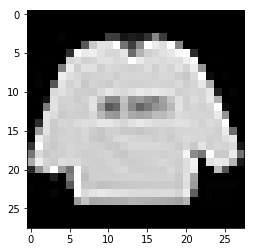

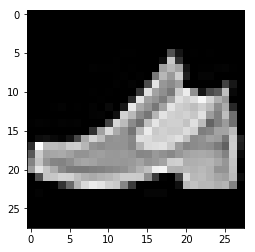

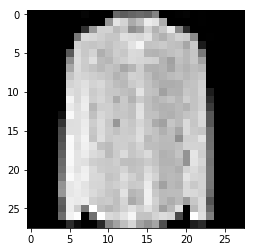

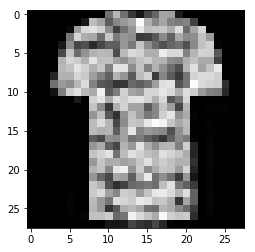

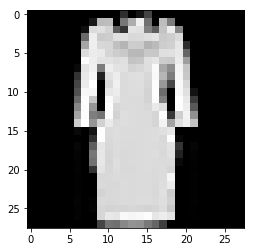

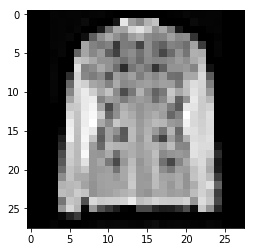

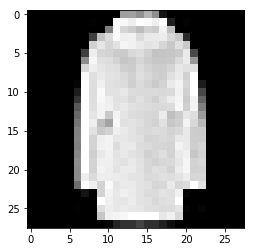

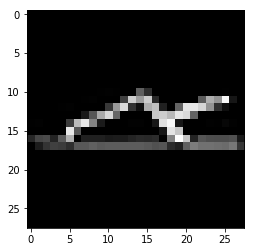

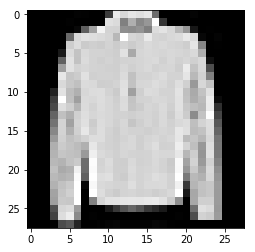

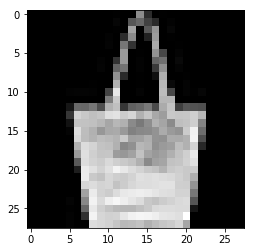

In [11]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.show()

# CNN Model


In [12]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()


Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
fla

In [13]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [16]:
hist=model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 78s 2ms/step - loss: 0.7625 - acc: 0.7229 - val_loss: 0.5083 - val_acc: 0.8247
Epoch 2/20
48000/48000 [==============================] - 78s 2ms/step - loss: 0.4385 - acc: 0.8444 - val_loss: 0.4205 - val_acc: 0.8652
Epoch 3/20
48000/48000 [==============================] - 225s 5ms/step - loss: 0.3758 - acc: 0.8690 - val_loss: 0.3788 - val_acc: 0.8773
Epoch 4/20
48000/48000 [==============================] - 77s 2ms/step - loss: 0.3434 - acc: 0.8787 - val_loss: 0.3926 - val_acc: 0.8624
Epoch 5/20
48000/48000 [==============================] - 77s 2ms/step - loss: 0.3196 - acc: 0.8865 - val_loss: 0.3585 - val_acc: 0.8749
Epoch 6/20
48000/48000 [==============================] - 77s 2ms/step - loss: 0.2975 - acc: 0.8944 - val_loss: 0.3191 - val_acc: 0.8973
Epoch 7/20
48000/48000 [==============================] - 77s 2ms/step - loss: 0.2817 - acc: 0.8991 - val_loss: 0.2996 - val_ac

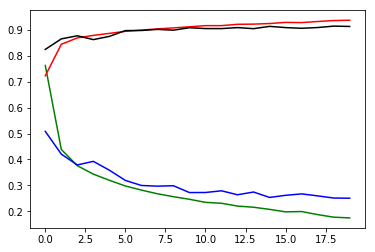

In [18]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()

In [22]:
x_test=pd.read_csv("./fashion-mnist_test.csv")
print(x_test.shape)

(10000, 785)


In [26]:
x_test=np.array(x_test)
X_test=x_test[:,1:]
Y_test=x_test[:,0]
print(X_test.shape)
print(Y_test.shape)

(10000, 784)
(10000,)


In [33]:
X_test=X_test.reshape((-1,28,28,1))
Y_test=np_utils.to_categorical(Y)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(60000, 10)


In [34]:
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [35]:
preds=model.predict(X_test)


In [38]:
from sklearn.metrics import classification_report
print("[INFO] evaluating network...")
print(classification_report(Y_test.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.88      0.92      0.90      6000
     trouser       0.99      0.99      0.99      6000
    pullover       0.90      0.92      0.91      6000
       dress       0.92      0.96      0.94      6000
        coat       0.90      0.92      0.91      6000
      sandal       1.00      0.99      0.99      6000
       shirt       0.90      0.77      0.83      6000
     sneaker       0.98      0.98      0.98      6000
         bag       0.99      0.99      0.99      6000
  ankle boot       0.97      0.98      0.98      6000

   micro avg       0.94      0.94      0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



In [41]:
from keras import backend as K